In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pywt
from PIL import Image, ImageOps
from structured_random_features.src.models.weights import V1_weights
from sklearn.linear_model import Lasso
import pandas as pd

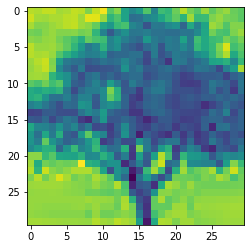

In [10]:
image_nm = 'image/tree_part1.jpg'
img = Image.open(image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.imshow(img_arr)

In [4]:
# Wavelet Decomposition Lv 2
#lv = 2
w = 'db2'
coeffs = pywt.dwt2(img, wavelet = w)
LL, (LH, HL, HH) = coeffs
reconst = pywt.idwt2(coeffs, w)

In [5]:
coeffs

(array([[426.625     , 422.28020872, 425.76313972, 418.5661071 ,
         421.48533574, 436.35552627, 393.51185103, 309.66072573,
         252.80449192, 266.94415619, 322.40321248, 391.56546276,
         365.11186028, 376.59303089, 395.53613423, 362.375     ],
        [431.12195092, 421.65215964, 417.65160162, 425.72395641,
         422.65303983, 446.43354759, 376.67835275, 315.07995437,
         219.87162874, 245.57948267, 319.05423295, 359.7536703 ,
         351.04927395, 374.88517696, 392.65488655, 362.84784036],
        [387.05056265, 382.59423326, 399.69134295, 401.16521303,
         399.08892896, 366.14157417, 215.95753175, 268.60447342,
         208.36306265, 197.92371593, 203.81073961, 204.50008633,
         229.52140677, 352.83525866, 348.30296738, 396.56962788],
        [413.64863886, 404.9411071 , 406.7698591 , 378.41360216,
         295.91216395, 283.20231378, 260.9744281 , 205.99158342,
         162.045431  , 201.20624306, 189.58285393, 218.55408342,
         280.35015877,

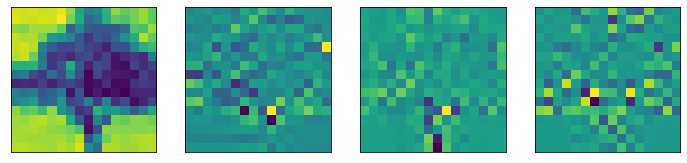

In [6]:
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a)
    ax.set_xticks([])
    ax.set_yticks([])

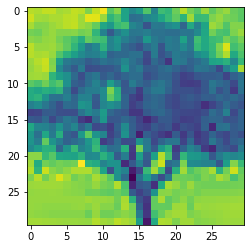

In [7]:
plt.imshow(reconst)

In [8]:
wavedecn(img, 'db2')

NameError: name 'wavedecn' is not defined

In [ ]:
from pywt import wavedecn

coeffs = wavedecn(np.ones((10,4,4)), 'db2')

In [ ]:
coeffs

In [11]:
cn, cm = img_arr.shape
samp = np.floor(cn * cm * 0.5).astype(int)
rand_index = np.random.randint(0, cn * cm, samp)
y = img_arr.flatten()[rand_index].reshape(samp, 1)

y = y * np.sqrt(cn * cm)
C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
C

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
np.unique(C)

array([ 0., 30.])